### 1. What is the fundamental idea behind the YOLO (You Only Look Once) object detection framework?

The fundamental idea behind the YOLO (You Only Look Once) object detection framework is to perform object detection in real-time by dividing the input image into a grid and predicting bounding boxes and class probabilities directly from the whole image in a single forward pass through the neural network.

Here are the key aspects of the YOLO framework:

1. `Single Forward Pass:`
YOLO processes the entire image in a single forward pass through the neural network. Unlike some other object detection methods that rely on region proposals and multiple stages, YOLO directly predicts bounding boxes and class probabilities in one pass.

2. `Grid System:`
The input image is divided into a grid. YOLO predicts bounding boxes and class probabilities at each grid cell. Each grid cell is responsible for predicting objects that fall into it.

3. `Bounding Box Prediction:`
For each grid cell, YOLO predicts multiple bounding boxes along with confidence scores. Each bounding box is represented by a set of coordinates (x, y) for the box center, width, and height. The confidence score indicates how likely the bounding box contains an object.

4. `Class Prediction:`
YOLO predicts class probabilities for each bounding box. For every bounding box, the model predicts the probability distribution over all the classes. This allows YOLO to detect multiple object classes in a single pass.

5. `Non-Maximum Suppression:`
After the predictions are made, a post-processing step called non-maximum suppression is applied to remove redundant and overlapping bounding boxes. This helps in keeping only the most confident and accurate predictions.

The YOLO architecture has undergone several versions (YOLOv1, YOLOv2, YOLOv3, etc.), with each version introducing improvements in terms of accuracy and speed. YOLO has gained popularity for its efficiency in real-time object detection applications, such as video surveillance, autonomous vehicles, and more.

### 2. Explain the difference between YOLOv1 and traditional sliding window approaches for object detection.

The main difference between YOLOv1 (You Only Look Once version 1) and traditional sliding window approaches for object detection lies in their methodology and efficiency. Here's a comparison between the two:

#### `Single Pass vs. Multiple Passes:`

* `YOLOv1:` YOLO performs object detection in a single forward pass through the neural network. It divides the input image into a grid and predicts bounding boxes and class probabilities for each grid cell simultaneously. This is more efficient than traditional approaches.
* `Traditional Sliding Window:` Traditional methods typically involve sliding a window of fixed size across the entire image and applying a classifier to each window. This requires multiple passes over the image at different scales, leading to increased computational complexity.

#### `Global Context vs. Local Context:`

* `YOLOv1:` YOLO considers the global context of the entire image during prediction. Each grid cell is responsible for predicting objects within its region, allowing for a holistic understanding of the image.
* `Traditional Sliding Window:` Sliding window approaches focus on local regions of the image at different scales. While this approach can capture detailed information, it may miss the global context of the image.

#### `Efficiency:`

* `YOLOv1:` YOLO is more computationally efficient as it processes the entire image in one pass. This is especially advantageous for real-time applications, such as video analysis.
* `Traditional Sliding Window:` Traditional methods involve redundant computations as the classifier is applied to multiple overlapping windows. This can result in slower processing times, especially for large images.

#### `Bounding Box Regression:`

* `YOLOv1:` YOLO uses bounding box regression to directly predict bounding box coordinates, width, and height. This is part of the end-to-end training process.
* `Traditional Sliding Window:` Traditional methods may require additional steps for bounding box regression, leading to a more complex pipeline.

#### `Non-Maximum Suppression:`

* `YOLOv1:` YOLO incorporates non-maximum suppression to filter out redundant bounding box predictions and refine the final results.

* `Traditional Sliding Window:` Post-processing steps, such as non-maximum suppression, are often necessary in traditional methods to handle overlapping detections.



In summary, YOLOv1 introduced a paradigm shift by performing object detection in a single pass, considering the global context, and using bounding box regression within the neural network. This approach proved to be more efficient for real-time applications compared to traditional sliding window approaches, which involve multiple passes and focus on local regions of the image.

### 3. In YOLO V1, how does the model predict both the bounding box coordinates and the class probabilities for each object in an image?

In YOLOv1, the model predicts both bounding box coordinates and class probabilities for each object in an image using a single convolutional neural network (CNN) architecture. The final layer of the network outputs a tensor that combines these predictions.

Here's a breakdown of how YOLOv1 predicts bounding box coordinates and class probabilities:

#### `Grid Division:`

The input image is divided into an S x S grid. Each grid cell is responsible for predicting bounding boxes and class probabilities for the objects contained in that cell.

#### `Bounding Box Prediction:`

* For each grid cell, the model predicts B bounding boxes. Each bounding box is represented by 5 parameters: (x, y, w, h, confidence).
    * (x, y) are the coordinates of the center of the bounding box relative to the coordinates of the grid cell.
    * (w, h) are the width and height of the bounding box relative to the width and height of the entire image.
    * Confidence represents the model's confidence that the bounding box contains an object.

#### `Class Prediction:`
    
For each bounding box, the model predicts C class probabilities, where C is the total number of classes. These class probabilities are conditioned on the presence of an object in the bounding box.

#### `Output Tensor:`

* The final output tensor of the YOLOv1 network is of size S x S x (B * 5 + C). Each grid cell is associated with (B * 5 + C) values, which include bounding box predictions and class probabilities.

* The tensor is reshaped and then split into three components:

    * Bounding box coordinates: (x, y, w, h, confidence) for each of the B bounding boxes.
    * Class probabilities: C probabilities for each bounding box.
    * Confidence scores: Single confidence score for each bounding box.
    * The bounding box coordinates are then transformed to obtain the actual bounding box coordinates in the image space.
    
#### `Loss Function:`

YOLOv1 uses a combination of regression loss for bounding box coordinates and confidence scores, and classification loss for class probabilities to train the network. The loss is computed based on the difference between the predicted values and the ground truth.


By combining bounding box predictions and class probabilities in a unified network architecture, YOLOv1 achieves real-time object detection in a single pass, making it computationally efficient for various applications.

### 4. What are the advantages of using anchor boxes in YOLO V2, and how do they improve object detection accuracy?

Anchor boxes in YOLOv2 (You Only Look Once version 2) are a significant improvement over the original YOLO model, addressing some of its limitations. Anchor boxes help improve object detection accuracy in the following ways:

* `Handling Scale Variation:`
Anchor boxes allow the model to better handle objects of different sizes within the same grid cell. Each anchor box is associated with specific aspect ratios and scales, allowing the model to choose the anchor box that best fits the size and shape of the object in a particular grid cell.

* `Improved Localization:`
The use of anchor boxes improves the localization accuracy of bounding boxes. Instead of predicting arbitrary coordinates for bounding boxes, the model predicts offsets from the anchor boxes. This makes the bounding box prediction more stable and accurate.

* `Better Generalization:`
Anchor boxes enable the model to generalize better to objects of various shapes and sizes. This is particularly important in scenarios where objects may exhibit significant variability in scale and aspect ratio.

* `Reduction of Model Complexity:`
By using anchor boxes, YOLOv2 reduces the model complexity and avoids the need for predicting bounding box dimensions directly. The model predicts offsets from anchor box dimensions, which simplifies the training process and makes the model more robust.

* `Adaptability to Object Shapes:`
Anchor boxes provide the flexibility to adapt to different object shapes. The model can select anchor boxes that closely match the shapes of objects in the training data, leading to more accurate predictions during inference.

* `Mitigation of Grid Sensitivity:`
YOLOv2's use of anchor boxes helps mitigate the grid sensitivity issue present in YOLOv1. Grid sensitivity refers to the limitation where a single grid cell is responsible for detecting objects within that cell, potentially leading to suboptimal predictions for objects that span multiple cells. Anchor boxes address this limitation by offering more flexibility in handling objects of different sizes.

* `Enhanced Training Stability:`
The use of anchor boxes stabilizes the training process by providing a consistent framework for predicting bounding box dimensions. This stability contributes to better convergence during training and helps prevent divergence in the learning process.


In summary, anchor boxes in YOLOv2 enhance object detection accuracy by addressing scale variation, improving localization, supporting better generalization, reducing model complexity, adapting to object shapes, mitigating grid sensitivity, and enhancing training stability. These advantages contribute to YOLOv2's ability to handle a wider range of objects and achieve improved performance compared to its predecessor.

### 5. How does YOLO V3 address the issue of detecting objects at different scales within an image?


YOLOv3 (You Only Look Once version 3) addresses the issue of detecting objects at different scales within an image through the use of a feature pyramid network (FPN). The introduction of FPN in YOLOv3 allows the model to capture information from different scales in the input image, enabling more effective detection of objects of various sizes.

Here's how YOLOv3 addresses the scale variation issue:

* `Feature Pyramid Network (FPN):`
YOLOv3 incorporates a feature pyramid network, which is a type of neural network architecture designed to capture multi-scale features from different levels of a convolutional neural network (CNN). FPN adds a top-down pathway to the traditional bottom-up pathway of a CNN, creating a pyramid of feature maps with information at different spatial resolutions.

* `Multiple Detection Scales:`
YOLOv3 uses feature maps at multiple scales to perform object detection. The network processes the input image through multiple layers of the FPN, extracting features at different resolutions. This allows the model to simultaneously detect objects at both fine-grained and coarse-grained scales.

* `Detection at Different Levels:`
YOLOv3 performs object detection at multiple levels of the feature pyramid. Each level corresponds to a different scale of the input image. Objects of different sizes are more likely to be detected in feature maps at the appropriate scale, addressing the challenge of scale variation.

* `Detection Head for Each Scale:`
YOLOv3 has detection heads associated with feature maps at different scales. Each detection head is responsible for predicting bounding boxes and class probabilities for objects at its corresponding scale. This enables the model to be sensitive to objects of different sizes at different levels of the feature pyramid.

* `Striding at Different Levels:`
The use of different strides in the network architecture ensures that the feature maps at higher levels have larger receptive fields and cover larger regions of the input image. This helps in capturing context and features related to larger objects.

* `Integration of Multiple Scales:`
The final predictions from different scales are integrated to obtain a comprehensive set of detections across the entire image. Non-maximum suppression is applied to refine and consolidate the predictions, removing redundant or overlapping bounding boxes.


By leveraging a feature pyramid network, YOLOv3 effectively addresses the challenge of detecting objects at different scales within an image. This enables the model to handle a wide range of object sizes and improves the accuracy and robustness of object detection in diverse scenarios.

### 6. Describe the darknet-53 architecture used in YOLO V3 and its role in feature extraction.

Darknet-53 is the backbone architecture used in YOLOv3 (You Only Look Once version 3) for feature extraction. It serves as the feature extractor or backbone network responsible for processing the input image and extracting hierarchical features at different levels of abstraction. Darknet-53 is an extended version of the Darknet architecture, and it consists of 53 convolutional layers.

`Here are the key characteristics and components of the Darknet-53 architecture:`

* #### `Convolutional Layers:`
Darknet-53 consists of a series of convolutional layers with different filter sizes, strides, and activation functions. These layers are responsible for capturing low-level and mid-level features from the input image.

* #### `Residual Blocks:`
Residual connections, inspired by the ResNet architecture, are incorporated into Darknet-53 to address the vanishing gradient problem during training of deep networks. Residual blocks allow for the direct flow of information from one layer to another, facilitating the training of deeper networks.

* #### `Skip Connections:`
Darknet-53 includes skip connections that concatenate feature maps from previous layers to the current layer. These skip connections help in preserving spatial information and gradients, allowing the model to capture both fine-grained and high-level features.

* #### `Downsampling and Upsampling:`
The network performs downsampling (max-pooling) and upsampling operations at different layers to handle features at various resolutions. Downsampling is used to increase the receptive field and reduce spatial dimensions, while upsampling is employed to recover spatial information.

* #### `Feature Pyramid Network (FPN) Integration:`
Darknet-53 integrates the FPN concept by incorporating features from multiple scales. This is crucial for addressing the challenge of detecting objects at different scales within an image. FPN enhances the network's ability to capture multi-scale features, which is particularly important for accurate object detection.

* #### `Global Average Pooling:`
Darknet-53 uses global average pooling at the end of the network to aggregate spatial information across the entire feature map. This step helps in reducing the spatial dimensions and preparing the extracted features for subsequent processing in the detection head.

* #### `Parameter Efficiency:`
Darknet-53 is designed with the goal of being computationally efficient while maintaining good performance. The architecture achieves a balance between model complexity and computational cost, making it suitable for real-time object detection tasks.


In the YOLOv3 architecture, Darknet-53 is followed by additional detection heads that predict bounding boxes and class probabilities at different scales. The hierarchical features extracted by Darknet-53 are crucial for enabling the subsequent layers to make accurate predictions about objects of different sizes and shapes.

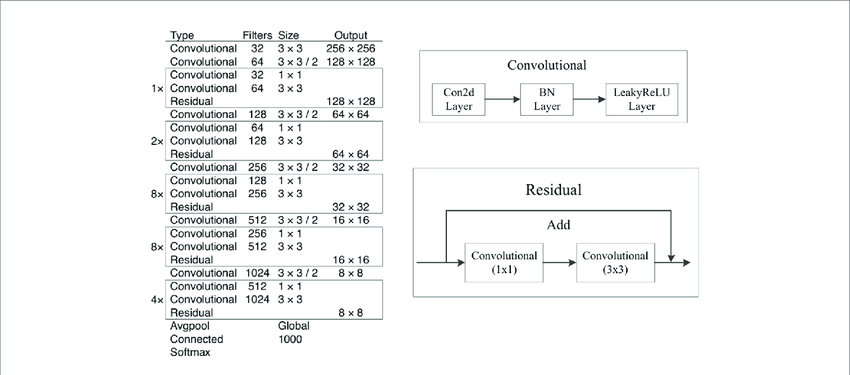

Overall, Darknet-53 plays a crucial role in feature extraction, providing a strong backbone for the YOLOv3 architecture and contributing to its success in real-time object detection tasks.

### 7. In YOLO V4, What technique are employed to enhance object detection accuracy, particularly in detecting small objects?

As of my last knowledge update in January 2022, YOLOv4 (You Only Look Once version 4) introduced several techniques to enhance object detection accuracy, especially in detecting small objects. Keep in mind that developments in the field may have occurred since then, and it's advisable to check the latest literature or official repositories for the most up-to-date information. Some of the techniques employed in YOLOv4 include:

* #### `CIOU Loss Function:`
YOLOv4 introduced the Complete IoU (CIOU) loss function, which is designed to improve bounding box regression accuracy. The CIOU loss takes into account both localization accuracy and shape similarity, making it more robust compared to traditional loss functions.

* #### `Data Augmentation:`
Increased and improved data augmentation techniques were employed to enhance model generalization and improve its ability to detect objects of varying scales. Augmentation strategies may include random scaling, translation, rotation, and other transformations to diversify the training dataset.

* #### `Spatial Attention:`
YOLOv4 incorporates spatial attention mechanisms to help the model focus on relevant regions of the input image. This can be particularly beneficial for detecting small objects in cluttered scenes.

* #### `Backbone Architecture Enhancements:`
YOLOv4 utilizes a CSPDarknet53 backbone, which is an enhanced version of the Darknet architecture. The modifications in the backbone architecture contribute to better feature extraction and, consequently, improved object detection accuracy for both large and small objects.

* #### `Panoptic Feature Pyramid Network (PanFPN):`
Panoptic Feature Pyramid Network is introduced to YOLOv4 to enhance the feature pyramid network. PanFPN facilitates multi-scale feature fusion, enabling the model to better handle objects at different scales and improving the detection of small objects.

* #### `Mish Activation Function:`
YOLOv4 replaces the traditional activation functions (such as ReLU or Leaky ReLU) with the Mish activation function. Mish is claimed to provide smoother and more stable activation values, potentially leading to better training and improved accuracy.

* #### `Bag of Freebies and Bag of Specials:`
YOLOv4 incorporates the concept of "Bag of Freebies" and "Bag of Specials" to enhance training and model performance. This includes integrating various techniques, such as label smoothing, cutmix, mosaic data augmentation, and more.

* #### `Weighted Residual Connections:`
Weighted residual connections are employed to allow the model to assign different importance weights to different residual connections. This can help the model prioritize features more effectively, especially in the context of detecting small objects.


These techniques collectively contribute to improving the accuracy of YOLOv4, making it more robust and capable of detecting objects across a wide range of scales, including small objects. It's important to note that YOLOv4 is a complex model with multiple innovations, and the synergy of these techniques contributes to its overall performance. For the latest information, you may want to refer to the official repository or publications related to YOLOv4.

### 8. Explain the concept of PANet (Path Aggregation Network) and its role in YOLO V4 architecture.


Path Aggregation Network (PANet) is a neural network module designed to enhance the feature hierarchy and information flow in the context of object detection and semantic segmentation tasks. PANet was introduced in the Mask R-CNN framework, which is an extension of Faster R-CNN that includes an additional branch for predicting pixel-level masks of object instances.

Here's an explanation of the key concepts behind PANet:

* #### `Motivation:`
The primary motivation behind PANet is to address the challenge of capturing both local and global contextual information effectively. In object detection and segmentation tasks, it's crucial to have a feature hierarchy that can capture details at different scales to handle objects of various sizes.

* #### `Feature Pyramid Network (FPN) Basis:`
PANet builds upon the idea of a Feature Pyramid Network (FPN). FPN is a network architecture designed to generate a feature pyramid by combining features from different layers of a convolutional neural network (CNN). FPN improves the ability of the network to handle objects at different scales.

* #### `Top-Down and Bottom-Up Pathways:`
PANet introduces both top-down and bottom-up pathways for feature aggregation. The top-down pathway involves upsampling higher-level features, while the bottom-up pathway refines lower-level features. This dual-path design allows PANet to capture information at multiple scales and resolutions.

* #### `Spatial Attention Mechanism:`
PANet incorporates a spatial attention mechanism to focus on relevant regions of the feature maps. This attention mechanism helps the network prioritize information from specific spatial locations, allowing it to adapt to the characteristics of the objects in the scene.

* #### `Adaptive Feature Aggregation:`
One of the key features of PANet is its adaptability in aggregating features based on the scale of objects. Adaptive feature pooling dynamically adjusts the receptive fields of the network, allowing it to selectively pool and aggregate information based on the scale of the objects present in the input image.

* #### `Iterative Refinement:`
PANet uses iterative refinement to improve the quality of the feature hierarchy. By iterating the process of feature aggregation and spatial attention, the network refines its representation of both local and global contextual information.

* #### `Applications in Mask R-CNN:`
In the Mask R-CNN framework, PANet is integrated as a key component to enhance the segmentation branch. The features aggregated by PANet contribute to the accurate delineation of object boundaries, leading to improved pixel-level mask predictions.


Overall, PANet aims to improve the feature hierarchy in a neural network, with a specific focus on capturing multi-scale contextual information. This makes it valuable for tasks such as object detection and semantic segmentation, where accurately modeling objects at different scales is crucial for achieving high performance.

### 9. What are some of the strategies used in YOLO V5 to optimise the model speed and efficiency?

`Here are some strategies used in YOLOv5 for optimization:`

* `Model Architecture:`
YOLOv5 employs a different model architecture compared to previous YOLO versions. The network architecture is designed to be more lightweight and efficient while maintaining high detection accuracy.

* `Backbone Network:`
YOLOv5 uses CSPDarknet53 as its backbone network, which is an efficient and modified version of the Darknet architecture. The choice of the backbone network influences the feature extraction process and, consequently, the efficiency of the model.

* `Model Pruning:`
YOLOv5 includes model pruning techniques to reduce the size of the model by eliminating redundant parameters and connections. Pruning helps in making the model more compact and faster during both training and inference.

* `Model Quantization:`
Quantization is a technique used to reduce the precision of model weights and activations, leading to a smaller model size and faster computations. YOLOv5 incorporates quantization methods to optimize the model's memory footprint and speed.

* `Dynamic Quantization:`
YOLOv5 uses dynamic quantization, which allows the model to adapt its precision during runtime based on the input data. This can lead to further optimizations in terms of both speed and memory usage.

* `Grid Size Reduction:`
YOLOv5 reduces the grid size used for predictions compared to previous YOLO versions. This reduction in grid size contributes to faster inference times while maintaining the model's ability to detect objects accurately.

* `Use of Efficient Backbones:`
YOLOv5 explores the use of efficient backbones, such as MobileNetV3, to achieve a good balance between model speed and accuracy. Efficient backbones are designed to be lightweight and suitable for real-time applications.

* `Optimized Inference Code:`
YOLOv5 includes optimized inference code that takes advantage of hardware acceleration (such as GPU support) to improve the speed of model predictions during deployment.

* `ONNX Format Export:`
YOLOv5 supports export to the Open Neural Network Exchange (ONNX) format, which is an open standard for representing neural network models. This allows for interoperability with different frameworks and can facilitate deployment on various platforms.

* `Support for Mixed Precision Training:`
YOLOv5 supports mixed precision training, allowing the use of lower-precision data types during training. This can result in faster training times while maintaining model accuracy.


These strategies collectively contribute to making YOLOv5 more optimized for speed and efficiency, making it suitable for real-time object detection applications.

### 10. How does YOLO V5 handle real time object detection, and what trade-offs are made to achieve faster inference times?

`Here are some aspects of how YOLOv5 achieves real-time object detection and the trade-offs made for faster inference:`

* `Model Architecture:`
YOLOv5 uses a modified model architecture compared to its predecessors. It incorporates a CSPDarknet53 backbone, which is an efficient variant of the Darknet architecture. The choice of an efficient backbone influences the feature extraction process, making it faster while maintaining high detection accuracy.

* `Model Size and Complexity:`
YOLOv5 is designed to be more lightweight and streamlined, which contributes to faster inference times. Model complexity, including the number of parameters and layers, is carefully considered to strike a balance between accuracy and speed.

* `Grid Size Reduction:`
YOLOv5 reduces the grid size used for predictions, which inherently speeds up the inference process. By predicting objects at a coarser resolution, the model reduces the number of computations required for each grid cell.

* `Quantization:`
YOLOv5 employs quantization techniques to reduce the precision of model weights and activations. Lower precision reduces memory bandwidth requirements, which can lead to faster inference times. However, quantization involves a trade-off with model accuracy, so the balance is carefully considered.

* `Model Pruning:`
YOLOv5 includes model pruning techniques to eliminate redundant parameters and connections, reducing the overall model size. A smaller model requires fewer computations, contributing to faster inference.

* `ONNX Export:`
YOLOv5 supports export to the Open Neural Network Exchange (ONNX) format. This allows for interoperability with different frameworks and can lead to optimized inference on specific hardware platforms.

* `Mixed Precision Training:`
YOLOv5 supports mixed precision training, allowing the use of lower-precision data types during training. While this can accelerate training, it also influences inference speed by utilizing lower-precision computations.

* `Hardware Acceleration:`
YOLOv5 takes advantage of hardware acceleration, such as GPU support, to speed up the inference process. Optimized inference code leverages parallel processing capabilities, leading to faster predictions.

`Trade-offs made to achieve faster inference times in YOLOv5 include:`

* `Quantization Trade-off:` Lowering precision through quantization can lead to faster inference but may result in a slight reduction in model accuracy.

* `Model Size Trade-off:` Smaller models generally require fewer computations, leading to faster inference, but there may be a trade-off with detection accuracy.

* `Grid Size Reduction Trade-off:` Coarser grid predictions reduce computation but may impact the ability to detect small objects accurately.


It's important to note that the specific trade-offs and optimizations in YOLOv5 may evolve with different releases, and users should refer to the official documentation or codebase for the most up-to-date information. Real-time object detection often involves a careful consideration of these trade-offs based on the specific requirements of the application.

### 11. Discuss the role of CSP Darknet53 in yolo v5 and how it contributes to improved performance.

CSP Darknet53 refers to the backbone architecture used in YOLO v5, where CSP stands for Cross Stage Partial. Here are some aspects of CSP Darknet53 and how it contributes to improved performance:

* #### `Feature Fusion:`
CSP Darknet53 employs a cross-stage feature fusion strategy, where features from different stages are combined in a way that allows the network to capture and propagate information more effectively.
Feature fusion helps to integrate low-level and high-level features, enabling the network to detect objects at various scales and levels of abstraction.

* #### `Reduced Memory Footprint:`
CSP Darknet53 is designed to reduce the memory footprint of the network while maintaining or improving performance. This is crucial for real-time applications and deployment on resource-constrained devices.

* #### `Backbone Architecture:`
The backbone architecture of an object detection model is responsible for extracting hierarchical features from the input image. CSP Darknet53 serves as the backbone in YOLO v5, providing the foundational feature extraction capabilities.

* #### `Improved Training Stability:`
CSP Darknet53 has been reported to contribute to improved training stability and faster convergence during the training process. This is beneficial for the overall training efficiency and effectiveness of the model.

* #### `Enhanced Performance:`
By incorporating CSP Darknet53, YOLO v5 aims to achieve better performance in terms of accuracy and speed compared to previous versions. The architecture is fine-tuned to balance the trade-off between accuracy and computational efficiency.

It's important to note that the information provided here is based on my last update in January 2022, and there might have been further developments or changes to YOLO v5 or its components since then. If there have been updates or new versions released after that date, I recommend checking the official documentation or publications for the latest information.

### 12. What are the key difference between YOLO V1 and and YOLO V5 in terms of model architecture and performance?

### `YOLO v1:`

1. `Architecture:`
YOLO v1 introduced the concept of dividing the input image into a grid and performing object detection within each grid cell.
It used a single convolutional neural network (CNN) to predict bounding boxes and class probabilities directly from the full image.

2. `Grid Cells:`
The image was divided into a fixed grid, and each grid cell was responsible for predicting bounding boxes and class probabilities.

3. `Loss Function:`
YOLO v1 used a specific loss function that combined localization and classification losses to train the model.

4. `Bounding Box Predictions:`
Each grid cell predicted multiple bounding boxes with associated confidence scores and class probabilities.


### `YOLO v5:`

1. `Architecture:`
YOLO v5 represents a departure from the original YOLO series, developed by Ultralytics. It employs a different architecture, and the backbone architecture is referred to as CSP Darknet53.

2. `Backbone:`
YOLO v5 uses CSP Darknet53 as its backbone architecture, which incorporates cross-stage feature fusion to improve information flow.

3. `Model Size and Variants:`
YOLO v5 comes in various sizes (small, medium, large, and extra-large) to offer a trade-off between speed and accuracy. Users can choose a variant based on their specific requirements.

4. `Training Approach:`
YOLO v5 introduced a training approach that involves transferring the model to devices with different capabilities (e.g., from a high-performance GPU during training to a lower-power device for deployment).

5. `Post-Processing Techniques:`
YOLO v5 incorporates post-processing techniques, such as non-maximum suppression, to refine and filter the final set of bounding box predictions.

6. `Improved Performance:`
YOLO v5 is designed to provide improved performance in terms of both accuracy and speed compared to its predecessors.

### 13. Explain the concept of multi-scale prediction in YOLO V3 and how does it help in detecting  objects of various size.

In YOLO v3 (You Only Look Once version 3), the concept of multi-scale prediction is introduced to enhance the detection of objects at different sizes. Multi-scale prediction is a key feature that allows the model to detect objects of varying scales and resolutions within an input image. This is particularly important in object detection scenarios where objects may appear at different distances from the camera or have different sizes in the image.

Here are the main components of multi-scale prediction in YOLO v3:

1. `Feature Pyramid:`
YOLO v3 incorporates a feature pyramid network to capture features at different scales. The feature pyramid is created by connecting feature maps from different stages of the network, allowing the model to analyze the image at various resolutions.

2. `Detection at Different Scales:`
YOLO v3 performs object detection at multiple scales simultaneously. This is achieved by applying detection layers at different levels of the feature pyramid.The model predicts bounding boxes, confidence scores, and class probabilities for objects at each scale.

3. `Anchor Boxes:`
YOLO v3 utilizes anchor boxes to improve the accuracy of bounding box predictions. Anchor boxes are pre-defined boxes of different sizes that are used during training to guide the model in predicting accurate bounding boxes for objects at various scales.

4. `Strided Convolution:`
The network employs strided convolutional layers to downsample the feature maps. These layers reduce the spatial resolution of the feature maps, enabling the model to capture larger receptive fields and detect larger objects.

5. `Upsampling:`
To handle smaller objects, YOLO v3 uses upsampling layers to increase the spatial resolution of certain feature maps. This allows the model to focus on finer details and detect smaller objects.

6. `Prediction Concatenation:`
Predictions from different scales are concatenated to form the final output. This consolidated prediction includes bounding box coordinates, confidence scores, and class probabilities for objects at various scales.


The multi-scale prediction mechanism in YOLO v3 contributes to the model's ability to detect objects across a wide range of sizes within a single forward pass. By considering features at different resolutions, YOLO v3 is better equipped to handle the challenges posed by objects of different scales, making it more versatile in real-world scenarios where objects can appear in various sizes and distances from the camera.

It's worth noting that YOLO v4 and YOLO v5 have continued to build upon these concepts, introducing further improvements in terms of accuracy and speed. For the most up-to-date information, it's recommended to refer to the latest documentation and publications related to YOLO models.

### 14. In YOLO V4, what is the role of the CIOU(Complete Intersection Over Union) loss function, and how does it impact object detection accuracy?

In YOLO v4 (You Only Look Once version 4), the CIOU (Complete Intersection over Union) loss function is introduced as an improvement over traditional Intersection over Union (IoU) metrics used in object detection tasks. The CIOU loss function aims to address some of the limitations associated with IoU, providing a more accurate and robust measure of bounding box similarity. The primary role of CIOU is to serve as a loss function during the training phase of the YOLO v4 model.

Here are key points about the CIOU loss function and its impact on object detection accuracy:

1. `Bounding Box Distance Metric:`
CIOU incorporates a more comprehensive distance metric for bounding boxes. It considers not only the Euclidean distance between box centers but also includes terms that account for box aspect ratio and diagonal length differences. This makes CIOU more sensitive to the actual shape and size of bounding boxes.

2. `Handling Box Overlaps:`
Traditional IoU measures the overlap of two bounding boxes based on their intersection and union areas. CIOU goes a step further by considering the complete intersection, accounting for the areas outside the intersection that are part of each box but not both. This provides a more nuanced understanding of box overlaps.

3. `Impact on Training:`
Using CIOU as a loss function during training helps the model to learn more accurate bounding box predictions. It encourages the model to produce bounding boxes that not only have high overlap with the ground truth but also align well in terms of shape and size.

4. `Mitigating Localization Errors:`
CIOU is designed to be more forgiving in cases where the predicted bounding box has localization errors. This helps in reducing the impact of small localization errors during training, potentially leading to more robust and accurate object localization.

5. `Improvement in Convergence:`
The use of CIOU has been reported to improve the convergence speed and stability during training. It can contribute to faster and more effective learning, resulting in a more accurate model.

It's important to note that while CIOU offers improvements over traditional IoU, the effectiveness of a loss function also depends on other factors such as the dataset, model architecture, and hyperparameter settings. The choice of the loss function is just one aspect of the overall design of an object detection system.

For the most up-to-date and detailed information about YOLO v4 and its components, including the CIOU loss function, it is recommended to refer to the official documentation, research papers, or publications released by the developers of the YOLO v4 model.

### 15. How does YOLO V2's architecture differ from YOLO V3, and what improvements were introduced in YOLO V3 compared to its predecessor?

### `YOLO v2 (YOLO9000):`

1. `Architecture:`
YOLO v2 introduced the concept of anchor boxes, allowing the model to predict bounding boxes with different aspect ratios and scales. This helped improve the model's ability to detect objects of varying shapes and sizes.

2. `Class Prediction:`
YOLO v2 expanded the number of classes it could detect to include a wide range of object categories. It introduced the idea of hierarchical classification, allowing the model to detect objects from a large number of classes.

3. `Detection at Different Scales:`
YOLO v2 used a feature pyramid network to detect objects at different scales. This involved extracting features at multiple resolutions to handle objects of various sizes.

### `YOLO v3:`

1. `Architecture:`
YOLO v3 introduced a more complex architecture compared to its predecessors. It adopted a feature pyramid network, similar to YOLO v2, but it also utilized multiple detection heads at different scales. YOLO v3 offered a trade-off between speed and accuracy by providing different model sizes (tiny, small, medium, large, and extra-large).

2. `Multiple Scales and Detection Heads:`
YOLO v3 featured three detection heads at different scales in the network. These detection heads were responsible for predicting bounding boxes and class probabilities at specific resolutions. This multi-scale approach allowed the model to handle objects of different sizes more effectively.

3. `Backbone Network:`
YOLO v3 introduced a new backbone architecture called Darknet-53, which was deeper and more powerful than the architecture used in YOLO v2. This backbone network improved feature extraction capabilities.

4. `Improved Object Detection:`
YOLO v3 aimed to improve object detection accuracy by addressing challenges related to object scale and aspect ratio. The introduction of multiple scales, anchor boxes, and a more powerful backbone network contributed to better performance.

5. `Bounding Box Regression:`
YOLO v3 refined the bounding box regression mechanism, incorporating the CIOU (Complete Intersection over Union) loss function. This loss function aimed to improve the accuracy of bounding box predictions.

6. `YOLO9000 Integration:`
YOLO v3 continued the idea of hierarchical classification but simplified it by removing some complexities present in YOLO9000. It was capable of detecting a large number of object categories without the hierarchical structure used in YOLO9000.


Overall, YOLO v3 brought several improvements in terms of accuracy, flexibility, and handling objects at different scales compared to YOLO v2. The architecture enhancements and the introduction of new techniques contributed to better object detection performance.

### 16. What is the fundamental concept behind YOLO v5's object detection approach, and how does it differ from earlier versions of YOLO?

YOLO v5's object detection approach revolves around a unique concept called "You Only Look Once" (YOLO). This means that unlike traditional methods which rely on multiple stages for object detection, YOLO v5 utilizes a single, powerful neural network to achieve the task in one forward pass. This single-stage approach offers several key advantages:

1. Real-time Speed: By eliminating the need for multiple processing stages, YOLO v5 can achieve object detection in real-time, making it ideal for applications like video surveillance and autonomous driving.

2. End-to-End Training: The entire YOLO v5 network, from input image to final bounding boxes and class probabilities, is trained jointly. This allows the network to learn the optimal relationships between features and predictions, leading to improved accuracy.

3. Unified Framework: YOLO v5 combines object detection, bounding box prediction, and class classification into a single network. This simplifies the architecture and reduces the computational complexity compared to multi-stage approaches.

Here's a breakdown of the key steps involved in YOLO v5's object detection process:

* Image Input: The input image is divided into a grid of cells.

* Feature Extraction: The image is passed through a convolutional neural network (CNN) that extracts features at various scales and resolutions.

* Prediction per Grid Cell: For each grid cell, the network predicts:

* Bounding box coordinates and dimensions: These define the location and size of the object within the cell.

* Confidence score: This indicates the certainty of the network that an object is present in the cell.

* Class probabilities: These represent the likelihood of each object class being present in the cell.

* Non-Max Suppression: To eliminate redundant predictions, a non-max suppression (NMS) algorithm is applied. This algorithm selects the most confident bounding box for each object, while suppressing overlapping or less confident ones.

* Output: The final output of YOLO v5 is a list of bounding boxes with their corresponding confidence scores and class labels.

#### Here's an image depicting the YOLO v5 architecture:

Additionally, YOLO v5 incorporates several key innovations that contribute to its impressive performance:

Dynamic Anchor Boxes: Instead of using pre-defined anchor boxes, YOLO v5 dynamically generates them based on the training data. This ensures the anchor boxes are better suited to the specific object sizes and shapes present in the dataset.
Spatial Pyramid Pooling: This technique allows the network to capture features at multiple scales, improving its ability to detect both large and small objects.
Focus mechanism: This mechanism focuses the network's attention on regions with higher object density, leading to more efficient resource allocation.
Overall, YOLO v5's "You Only Look Once" approach, coupled with its innovative features, has made it a highly effective and efficient object detection algorithm, paving the way for real-time applications in various domains.

YOLO v5 builds upon the foundation of its predecessors, offering significant improvements in speed, accuracy, and ease of use. Here's a breakdown of how it differs from earlier versions:

1. Architecture:
   * YOLO v1-v3: Used Darknet framework, limiting their flexibility and customization.
   * YOLO v5: Uses PyTorch, making it more user-friendly and easier to integrate into existing projects.

2. Backbone Network:
   * YOLO v1-v3: Primarily relied on simple convolutional layers.
   * YOLO v5: Introduces CSPNet (Cross-Stage Partial Network) backbone, improving feature extraction and boosting accuracy.

3. Anchor Boxes:
   * YOLO v1-v4: Used pre-defined anchor boxes, potentially mismatching object sizes.
   * YOLO v5: Utilizes dynamic anchor boxes generated from the training data, leading to better fit for object shapes and sizes.

4. Feature Extraction:
   * YOLO v1-v3: Limited feature extraction capabilities.
   * YOLO v5: Implements Spatial Pyramid Pooling (SPP) to capture features at multiple scales, enhancing detection of both large 
     and small objects.

5. Focus Mechanism:
   * YOLO v1-v4: No dedicated focus mechanism.
   * YOLO v5: Employs a focus mechanism that directs the network's attention to regions with higher object density, optimizing 
     resource allocation.

6. Performance:
   * YOLO v1-v4: Typically slower and less accurate than YOLO v5.
   * YOLO v5: Offers state-of-the-art performance, achieving real-time object detection at up to 140 frames per second (FPS) on 
     a single GPU while maintaining high accuracy.

### 17. Explain the anchor boxes in YOLOv5. How do they affect the aglorithm's ability to detect objects of different sizes and aspect ratios?


Here's a detailed explanation of anchor boxes in YOLOv5 and their impact on object detection:

#### What are Anchor Boxes?

* Predefined bounding boxes with different sizes and aspect ratios.
* Serve as initial references for the model to predict object locations and dimensions.
* Help the model focus on areas where objects are likely to be present.

#### YOLOv5's Approach to Anchor Boxes:

* Dynamic Generation: Instead of using fixed, pre-defined anchor boxes, YOLOv5 dynamically generates them based on the training data.
* K-means Clustering Algorithm: Analyzes the bounding box dimensions in the training dataset to determine the optimal anchor box sizes and aspect ratios.
* Customization: This approach ensures the anchor boxes are tailored to the specific object sizes and shapes in the dataset, leading to better detection accuracy.

#### How Anchor Boxes Affect Object Detection:

1. Guiding the Detection Process:
   - Anchor boxes act as starting points for the model's predictions.
   - The model predicts offsets from the anchor box coordinates to refine the final bounding box positions and dimensions.
   - This guidance makes the detection process more efficient and accurate.
   
2. Handling Different Sizes and Aspect Ratios:
   - By using multiple anchor boxes with varying sizes and aspect ratios, YOLOv5 can better capture objects of different shapes 
     and scales.
   - Each anchor box is responsible for detecting objects that closely match its shape and size.
   - This leads to improved detection of diverse object types.

3. Reducing False Positives:
   - Anchor boxes filter out regions unlikely to contain objects, reducing false positive detections.
   - The model only considers anchor boxes with high predicted object scores, leading to more precise results.

4. Improving Detection Speed:
   - Anchor boxes streamline the prediction process, making it faster.
   - The model only needs to refine offsets from the anchor boxes rather than predicting bounding box coordinates from scratch.

#### Key Points:

YOLOv5's dynamic anchor box generation is a significant improvement over fixed anchor boxes in earlier versions.
It enables better adaptation to specific datasets and object distributions.
Anchor boxes play a crucial role in YOLOv5's ability to detect objects of various sizes and aspect ratios accurately and efficiently.

In summary, anchor boxes in YOLOv5:

* Provide a strong foundation for accurate object detection.
* Enhance the model's ability to handle objects with diverse shapes and sizes.
* Contribute to both speed and accuracy improvements.

### 18. Describe the architecture of YOLOv5, including the number of layers and their purpose in the network.

YOLOv5 Architecture Overview:

* `Single-stage object detector:` Processes images in one forward pass, enabling real-time performance.

* `Key components:` Backbone, Neck, and Head.

#### 1. Backbone:

* Purpose: Extracts rich feature representations from input images.
* CSPDarknet53: Primary backbone architecture, enhancing feature extraction and accuracy.
* Key features:
   * CSP (Cross-Stage Partial Connections): Reduces computational cost and improves learning ability.
   * Focus structure: Downsamples input, then splits and merges it for multi-scale feature extraction.
* Layers: Approximately 53 convolutional layers.

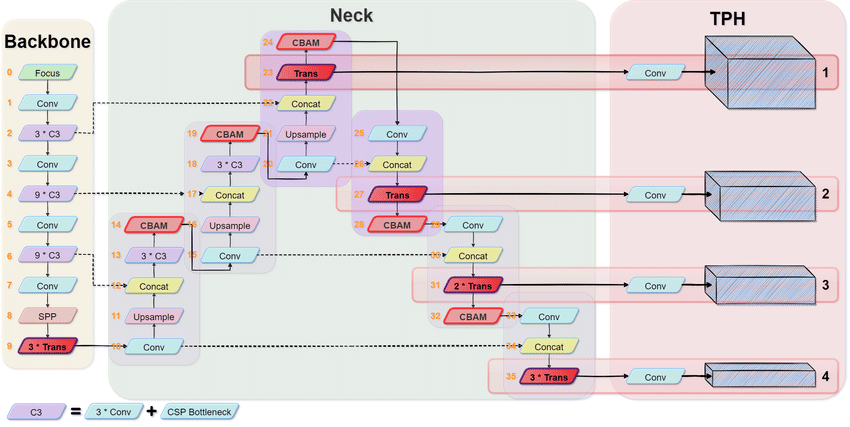

#### 2. Neck:

* Purpose: Fuses features from different backbone stages for multi-scale object detection.
* Key components:
   * PANet (Path Aggregation Network): Combines features from top-down and bottom-up paths for enhanced context awareness.
   * SPP (Spatial Pyramid Pooling): Extracts multi-scale features for improved detection of objects of varying sizes.
* Layers: Approximately 10-15 convolutional layers.

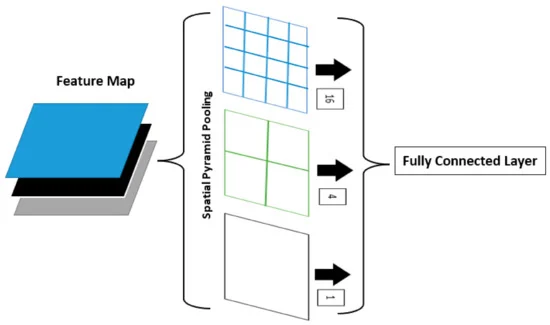

#### 3. Head:

* Purpose: Generates final detections (bounding boxes, confidence scores, and class probabilities).
* Key features:
   * YOLOv3 head: Predicts bounding boxes and scores at three different scales for detecting objects of various sizes.
   * Grid-based prediction: Divides input image into grids, each cell responsible for detecting objects within its region.
* Layers: 3 detection layers, each with 3 anchors for multi-scale prediction.

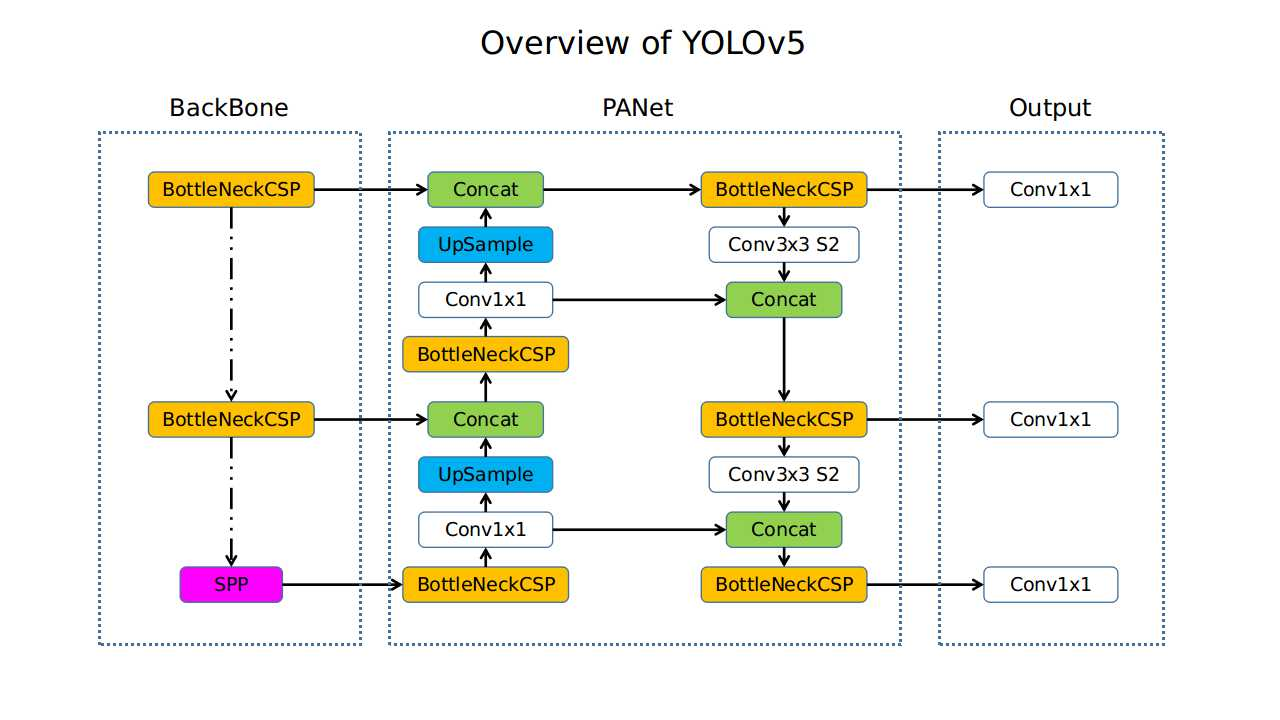

#### Additional Components:

* SPP: Enhances multi-scale feature extraction.
* PAN: Improves multi-scale feature fusion.
* Focus structure: Optimizes feature extraction efficiency.
* SiLU activation: Introduces non-linearity for better learning.
* CIOU loss: Refines bounding box predictions for more accurate localization.


Overall, YOLOv5's streamlined architecture, efficient feature extraction, and multi-scale prediction capabilities contribute to its remarkable speed and accuracy in object detection tasks.

### 19. YOLOv5 introduces the concept of CSPDarknet53. what is CSPDarknet53, and how it contributes to the model's performance?

CSPDarknet53 is a key innovation in YOLOv5 and plays a significant role in its performance improvements. Here's a breakdown of what it is and how it contributes:

`What is CSPDarknet53?`

* It's the backbone network of YOLOv5, responsible for extracting rich feature representations from input images.
* It builds upon the Darknet53 architecture used in earlier YOLO versions, but with a crucial improvement: Cross-Stage Partial Connections (CSP).

`Key Features of CSPDarknet53:`

* CSP: This innovative technique splits the feature extraction process into two parts:
  * Main branch: Performs regular convolution operations.
  * Shortcut branch: Employs lightweight residual connections.
* Benefits of CSP:
  * Reduced computational cost: By using lightweight operations in the shortcut branch, CSPDarknet53 achieves similar performance with fewer parameters compared to Darknet53.
  * Improved learning ability: The residual connections from the shortcut branch help propagate relevant information throughout the network, enhancing feature extraction and model accuracy.
  * Enhanced gradient flow: CSP allows gradients to flow back through the network more effectively, leading to better optimization and performance.

`Contributions to YOLOv5's performance:`

* Faster inference speed: Reduced computational cost from CSP enables real-time object detection in YOLOv5.
* Higher accuracy: Improved feature extraction through CSP leads to more precise object detection and classification.
* Better memory efficiency: Lower parameter count from CSP makes YOLOv5 lighter and more suitable for deployment on resource-constrained devices.

`Additional points to note:`

* CSPDarknet53 is just one element of YOLOv5's success. The combination of various innovations like dynamic anchor boxes, PANet, and SPP also contribute to its overall performance.
* Other variants of CSPDarknet53 exist, such as CSPDarknetX, for adapting the architecture to different resource constraints and performance requirements.

Overall, CSPDarknet53 is a significant architectural improvement that enhances YOLOv5's speed, accuracy, and efficiency, making it a powerful and versatile tool for real-time object detection.

### 20. YOLOv5 is known for its speed and accuracy. Explain how YOLOv5 achieves a balance between these two factors in object detection tasks.


Balancing speed and accuracy in object detection is a constant challenge, and YOLOv5 achieves this feat through a combination of clever architectural choices and innovative algorithm design. Here's how:

#### Architectural Trade-offs:

* `Single-Stage Architecture:` Compared to multi-stage approaches, YOLOv5 processes the image in a single forward pass, significantly reducing computation cost and enabling real-time performance. This comes at a slight expense to potential accuracy, as multi-stage models can refine results in multiple steps.

* `Light-Weight Design:` YOLOv5 prioritizes efficient feature extraction techniques such as CSPDarknet53, reducing the number of parameters and operations without sacrificing significant accuracy. This lighter structure allows for faster inference speeds on various hardware platforms.

* `Dynamic Anchor Boxes:` Instead of using pre-defined anchor boxes that might mismatch object sizes, YOLOv5 dynamically generates them based on the training data. This ensures better fitting to object shapes and sizes, improving both accuracy and efficiency.

#### Algorithm Design Techniques:

* `Focus Mechanism:` Concentrates the network's attention on areas with higher object density, reducing wasted processing power and optimizing resource allocation for improved speed and accuracy.
* `Multi-Scale Feature Fusion:` YOLOv5 combines features from different network layers through techniques like PANet and SPP. This captures information at various scales, enabling the detection of both large and small objects while maintaining efficiency.
* `Loss Function Design:` The network uses a custom loss function called CIOU loss, which penalizes inaccurate bounding box predictions more than traditional methods. This helps refine localization, leading to better spatial accuracy without significantly impacting speed.

Overall, YOLOv5 strikes a balance between speed and accuracy by:

1. Prioritizing a single-stage architecture for real-time performance.
2. Employing efficient feature extraction techniques and lightweight design.
3. Dynamically adapting to object sizes and shapes with dynamic anchor boxes.
4. Utilizing focus mechanisms and multi-scale feature fusion for optimized resource allocation.
5. Fine-tuning spatial accuracy through custom loss functions.

This combination of factors allows YOLOv5 to achieve remarkable performance in object detection tasks, making it a valuable tool for applications requiring both speed and reliability.

Remember, the ideal balance between speed and accuracy depends on the specific task and requirements. YOLOv5 offers different configuration options and variants to fine-tune this balance for various scenarios.

### 21. What is the role of data augmentation in YOLOv5? How does it help improve the model's robustness and generalization?

Data augmentation plays a crucial role in enhancing the robustness and generalizability of YOLOv5, improving its performance on unseen data and real-world scenarios. Here's how:

`What is Data Augmentation?`

* This technique artificially expands the training dataset by applying various transformations to existing images.
* Examples: random cropping, resizing, flipping, rotating, changing brightness/contrast, adding noise, etc.
* These transformations create slightly modified versions of the original images, effectively increasing the training data size.

`Benefits for YOLOv5:`

1. Reduces Overfitting: Overfitting occurs when the model memorizes the training data too well and fails to generalize to new, unseen examples. Data augmentation diversifies the training data, forcing the model to learn generalizable features applicable to various situations.
2. Improves Robustness: By exposing the model to diverse image variations, data augmentation makes it less susceptible to specific noise or lighting conditions in real-world deployments. This results in more robust and consistent object detection performance across different environments.
3. Enhances Generalizability: By introducing variations in object positions, sizes, and orientations, data augmentation expands the model's understanding of object appearances in different contexts. This improves its ability to generalize to unseen data and detect objects accurately even if they appear differently than in the training set.

`YOLOv5's Data Augmentation Approach:`

* Utilizes online image-space and color-space augmentations during training.
* Applies mosaic augmentation, combining four images (original + 3 random) for each training step, creating a larger, more diverse training sample.
* Integrates seamlessly with Albumentations, a popular open-source library offering extensive data augmentation capabilities.
* This flexibility allows users to fine-tune and customize the data augmentation pipeline for specific tasks and datasets.

Overall, data augmentation is a powerful tool that significantly contributes to YOLOv5's success. By diversifying the training data and exposing the model to a wider range of image variations, it helps the model learn robust and generalizable features, improving its performance in real-world scenarios.

`Additional points:`

* The choice of data augmentation techniques and their intensity depends on the specific dataset and task. Overly aggressive augmentation can harm performance, so finding the right balance is crucial.
* YOLOv5's online augmentation approach is efficient and avoids storing augmented images, saving storage space and computation time.

### 22. Discuss the importance of anchor box clustering in YOLOv5. How is it used to adapt to specific datasets and object distributions?

Anchor boxes play a crucial role in object detection models like YOLO. They help the model handle variations in object sizes and aspect ratios, making the predictions more robust. Anchor box clustering is a technique used to determine suitable anchor boxes for a specific dataset during the training process.

Here's how anchor box clustering is generally used and why it's important:

1. `Handling Object Variability:` Objects in an image dataset can vary significantly in terms of size and aspect ratio. Anchor boxes provide a set of predefined shapes that the model can use to predict bounding boxes. Clustering helps identify anchor box sizes that best match the distribution of object sizes in the training dataset.

2. `K-Means Clustering:` The process typically involves applying K-Means clustering on the bounding box annotations in the training dataset. K-Means clustering groups bounding boxes with similar dimensions into clusters, and the centroids of these clusters become the anchor boxes. The number of clusters (K) determines the number of anchor boxes.

3. `Adapting to Dataset Characteristics:` Different datasets may have different characteristics, and anchor box clustering allows the model to adapt to the specific distribution of object sizes within a given dataset. For example, a dataset with a wide range of object sizes might result in anchor boxes that cover this range effectively.

4. `Improving Model Accuracy:` The use of well-chosen anchor boxes improves the accuracy of the model's bounding box predictions. It enables the model to generalize better to objects of varying sizes and shapes, ultimately leading to better detection performance.

5. `During Training:` Once the anchor boxes are determined, they are typically used during the training process to guide the model in predicting bounding boxes. The model learns to adjust the predicted boxes based on the anchor boxes, which act as reference points for object localization.

It's important to note that anchor box clustering is part of the preprocessing steps during the setup of the object detection model, and it contributes to the model's ability to make accurate predictions across diverse object sizes. The choice of anchor boxes can impact the model's performance, and it's often recommended to revisit this step when working with different datasets.

### 23. Explain how YOLOv5 handles multi-scale detection and how this features enhances its object detection capabilities.

YOLOv5 tackles multi-scale object detection in several ways, each contributing to its impressive performance:

1. `Feature Pyramid Network (FPN):` YOLOv5's backbone extracts features at different scales (high resolution for small objects, low resolution for large ones). The FPN cleverly combines these features, allowing the model to detect objects of all sizes effectively. It merges high-level semantic features with low-level detail features, preserving spatial information crucial for small object detection.

2. `Anchor Boxes:` YOLOv5 uses pre-defined anchor boxes at each feature level, each representing a specific object size and aspect ratio. These boxes predict the location and size of detected objects, optimized for different scales thanks to the FPN.

3. `Scale Augmentation:` During training, YOLOv5 randomly scales and crops images (scale jitter), forcing the model to adapt to detecting objects at different sizes. This increases its robustness to variations in input image scale.

4. `Multi-Scale Inference:` While the default inference size is 640x640, YOLOv5 allows flexible input sizes through the --img-size flag. This lets you optimize performance for specific needs, like prioritizing small object detection with higher resolutions.

5. `Decoupled Multi-Scale Head:` Some YOLOv5 variants like MLP-YOLOv5 implement decoupled multi-scale heads. Instead of using a single head for all object sizes, they have separate heads for different scales, further improving accuracy for each size range.

These combined techniques give YOLOv5 its multi-scale detection prowess. The FPN and anchor boxes handle different scales within the network, while scale augmentation during training prepares it for real-world variations. Additionally, flexible inference size and decoupled head variations offer further customization for specific needs. This multi-pronged approach enhances YOLOv5's object detection capabilities in two key ways:

* Improved Accuracy: YOLOv5 excels at detecting objects of various sizes, reducing missed detections and false positives, especially for small objects that often get lost in lower resolution models.
* Robustness and Adaptability: Its handling of multi-scale data makes YOLOv5 reliable in real-world scenarios where object sizes can vary greatly. You can fine-tune it for specific applications by adjusting image size and other parameters.


Overall, YOLOv5's multi-scale detection features make it a highly versatile and accurate object detector, leading it to popularity in various domains like autonomous vehicles, robotics, and security systems.

### 24. YOLOv5 has different variants, such as YOLOv5s, YOLOv5m, YOLOv5l, and YOLOv5x. What are the difference between these variants in terms of architecture and performance trade-offs?

The different YOLOv5 variants (s, m, l, x) represent a trade-off between model size, speed, and accuracy:

1. `Model Size:`

* YOLOv5s: smallest and fastest, ideal for resource-constrained environments like mobile devices or embedded systems.
* YOLOv5m: slightly larger and slower than s, but offers better accuracy.
* YOLOv5l: larger and slower than m, but delivers significant accuracy gains.
* YOLOv5x: largest and slowest, achieving the highest accuracy in the family.

2. `Speed:`

* YOLOv5s: fastest, capable of real-time inference on powerful devices.
* YOLOv5m: slower than s, but still suitable for real-time applications on mid-range hardware.
* YOLOv5l: slower than m, real-time performance may be limited depending on hardware.
* YOLOv5x: slowest, primarily for offline inference or high-performance setups.

3. `Accuracy:`

* YOLOv5s: lowest accuracy, can struggle with small objects or complex scenes.
* YOLOv5m: improves accuracy over s, good for general-purpose object detection.
* YOLOv5l: significantly more accurate than m, suitable for demanding tasks.
* YOLOv5x: highest accuracy in the family, ideal for critical applications.

#### Architectural Differences:

* Number of layers: s has the fewest layers, while x has the most. More layers generally increase accuracy but decrease speed.
* Channel depth: s has fewer channels per layer, while x has the most. More channels improve feature extraction but increase model size and computation.
* Activation functions: s and m use Leaky ReLU activations, while l and x use SiLU activations. SiLU can improve accuracy but slightly increases computational cost.

#### Choosing the Right Variant:

The best variant depends on your specific needs:

* For real-time applications on resource-limited devices: YOLOv5s or m.
* For balance between speed and accuracy for general tasks: YOLOv5m or l.
* For highest accuracy in demanding applications: YOLOv5l or x.

### 25. What are some potential application of YOLOv5 in computer vision and real-world scenarios, and how does its performance compare to other object detection algorithms?

YOLOv5's versatility and strong performance make it suitable for a wide range of applications, including:

#### `Computer Vision:`

* Object detection: Identifying and locating objects in images and videos, such as pedestrians, vehicles, traffic signs, and animals.
* Anomaly detection: Spotting unusual or suspicious objects or activities in video surveillance or security systems.
* Visual tracking: Following the movement of specific objects across video frames.
* Image/video understanding: Analyzing scenes and extracting information from images and videos for various tasks like self-driving cars, robotics, and medical imaging.

#### `Real-World Scenarios:`

* Autonomous vehicles: Detecting cars, pedestrians, and obstacles for path planning and collision avoidance.
* Retail and logistics: Analyzing inventory levels, detecting theft, and automating package sorting.
* Robotics: Object manipulation, navigation, and obstacle avoidance for robots.
* Security and surveillance: Identifying intruders, suspicious activity, and anomalies in video footage.
* Medical imaging: Identifying tumors, abnormalities, and other medical diagnoses in X-rays and scans.
* Agriculture: Crop health monitoring, weed and pest detection, and automated harvesting.
* Entertainment and gaming: Facial recognition, augmented reality, and object recognition in games.

YOLOv5 vs. Other Object Detection Algorithms:
While YOLOv5 excels in many aspects, its performance compared to other algorithms depends on specific considerations:

#### `Accuracy:`

Superior for real-time performance: YOLOv5 often outperforms Faster R-CNN and SSD in terms of real-time inference speed while maintaining good accuracy.
Competitive with state-of-the-art models: On COCO benchmark datasets, YOLOv5's accuracy competes with newer algorithms like DETR and BEVDet, although these may need more specialized hardware for comparable speeds.

#### `Speed:`

Among the fastest real-time detectors: YOLOv5 variants like s and m are remarkably fast, making them ideal for resource-constrained environments.
Slower than lightweight specialized models: TinyML implementations of other algorithms may achieve even faster inference on dedicated hardware.

#### `Model Size:`

Smaller than some, larger than others: YOLOv5 variants offer a range of sizes depending on desired performance. YOLOv5s is smaller than Faster R-CNN but larger than EfficientDet-D0.

#### `Flexibility:`

Highly customizable: YOLOv5 offers various pre-trained models, allows fine-tuning, and supports custom object training, making it adaptable to diverse tasks.
May require more expertise: Compared to user-friendly frameworks like TensorFlow Object Detection API, YOLOv5 might require more advanced computer vision knowledge for customization.

#### `Overall:`

YOLOv5 is a strong contender for real-time object detection tasks due to its balanced combination of accuracy, speed, and model size. Its flexibility and active development community further bolster its appeal. However, the best choice depends on specific priorities and constraints, and other algorithms may shine in specialized applications.